<img src="https://drstephenlynch.github.io/webpages/IMA_Header.png" alt="IMA Header">

# Predicting Financial Time Series using AI

**The Lorenz Equations**

In 1963, Edward Lorenz [1] derived the following system of differential equations as a very simple model of the weather:

$$\frac{dx}{dt}=10(y-x) \quad \frac{dy}{dt}=28x-y-xz, \quad \frac{dz}{dt}=xy-\frac{8}{3}z, \quad \quad (1)$$
where $x$ measures the rate of convective overturning, $y$ measures the horizontal temperature variation, and $z$ measures the vertical temperature variation.

In 1977, Kakwani [2] demonstrated that the solution curve to the Lorenz system could also be used as a tool to introduce distributional considerations in economic analysis.

**References**

[1] E.N. Lorenz, Deterministic non-periodic flow, <i>Journal of Atmoshpheric Science</i>, 20, (1963), 130-141.

[2] N.C. Kakwani, Applications of Lorenz curves in economic analysis, <i>Econometrica</i>, 45(3), (1977), 719-727.

Figure 1(a) shows the numerical solution for $x(t)$ for system (1) given the initial conditions, $x_0=0, y_0=1, z_0=1.05$, computed using Python. There are 1000 data points in the time series and it is known to be chaotic, or totally unpredictable.

**Predicting Chaos using AI**

We apply Artificial Intelligence (AI) to the problem of predicting chaos using Python and TensorFlow. We split the data, using 80% of the data to train the AI network (see Figure 2) and 20% of the data to test the AI network.

Figure 1(b) shows how the mean squared error for the training and testing data decreases. Figure 1(c) shows the historical data in green, the actual data in blue and the predicted data in red. Finally, Figure 1(d) clearly shows that AI can indeed predict chaos!

The obvious question then is: "Can we predict financial time series and make lots of money?"

<img src="https://drstephenlynch.github.io/webpages/Figure%201.png" alt="Figure 1">

**Predicting Financial Time Series using AI**

Below is a TensorFlow program that can be used to predict Google stock price data from Yahoo Finance. You can download "GOOG.csv" from Github. In the cell below you will choose the number of neurons in each layer $\left(N_1 , N_2, N_3 \right)$ of an AI network (see Figure 2), the learning rate, 0<eta<1, and the number of epochs.

<img src="https://drstephenlynch.github.io/webpages/Figure%202.png" alt="Figure 2">

There are three hidden layers, choose N1, N2, and N3 in the cell below.

Choose a learning rate, the higher the value, the faster the network learns. However, a higher learning rate also results in lower generalization capability.

Choose the number of epochs, Num_Epochs. An epoch refers to one complete pass of the entire training dataset through the learning algorithm.

In [ ]:
# Change the numbers to get the best prediction.
N1 , N2 , N3 = 8 , 15 , 10
eta = 0.1
Num_Epochs = 10

201 51
(200, 1, 1) (200,)
2/2 [==============================] - 1s 8ms/step


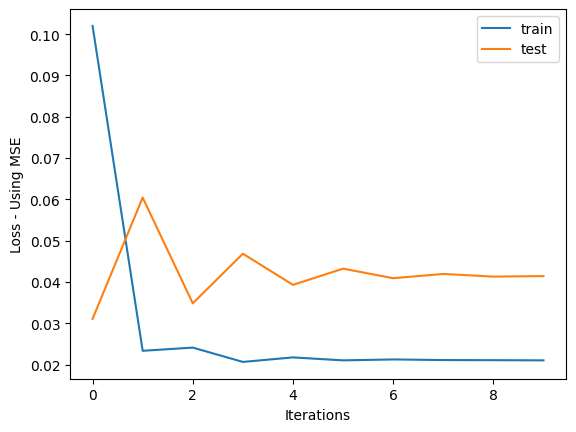

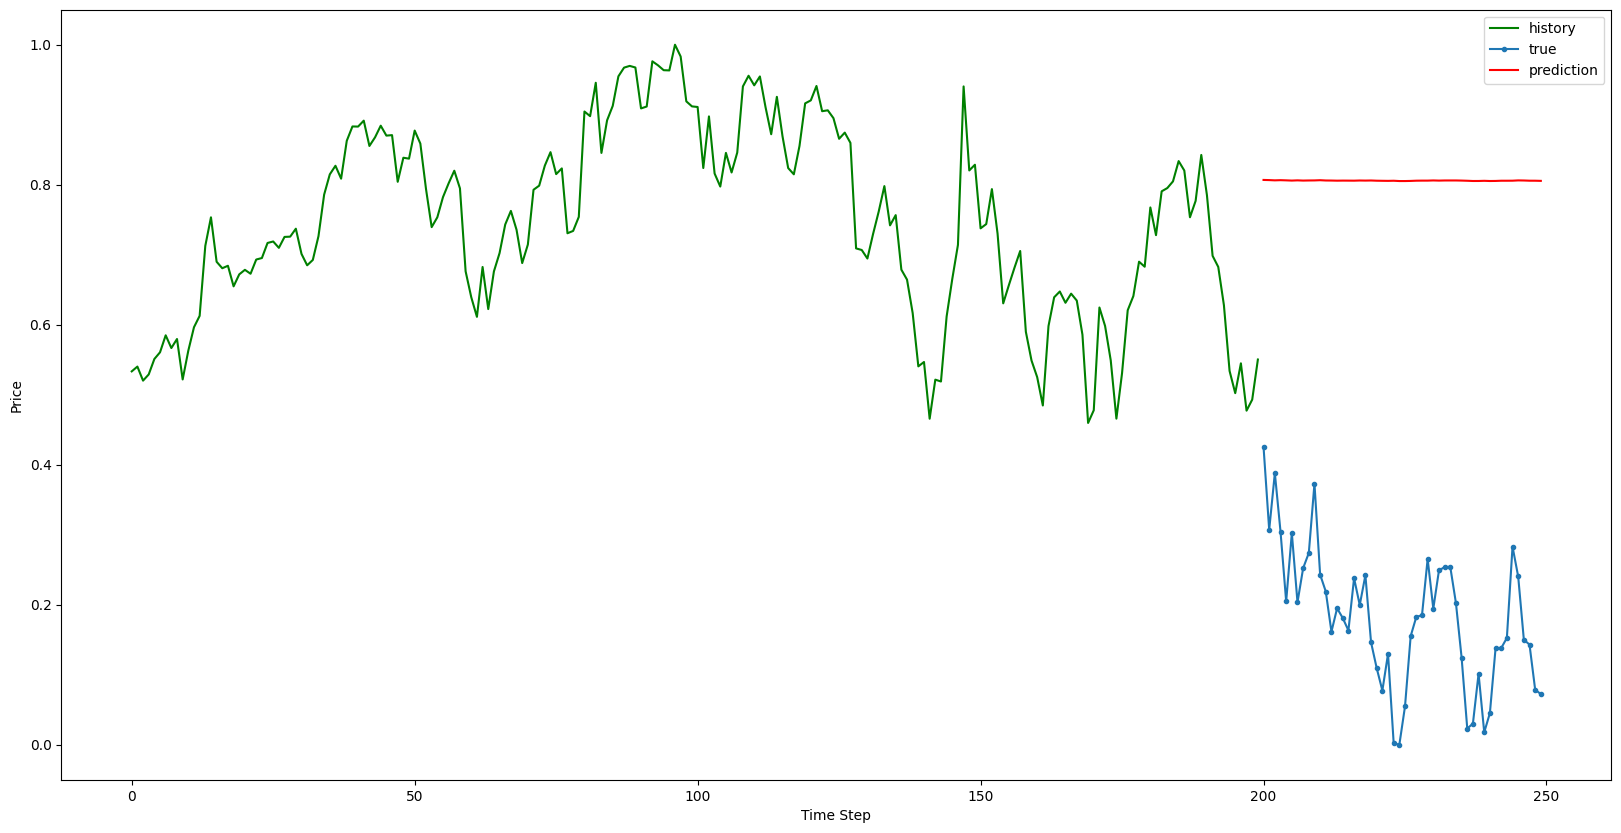

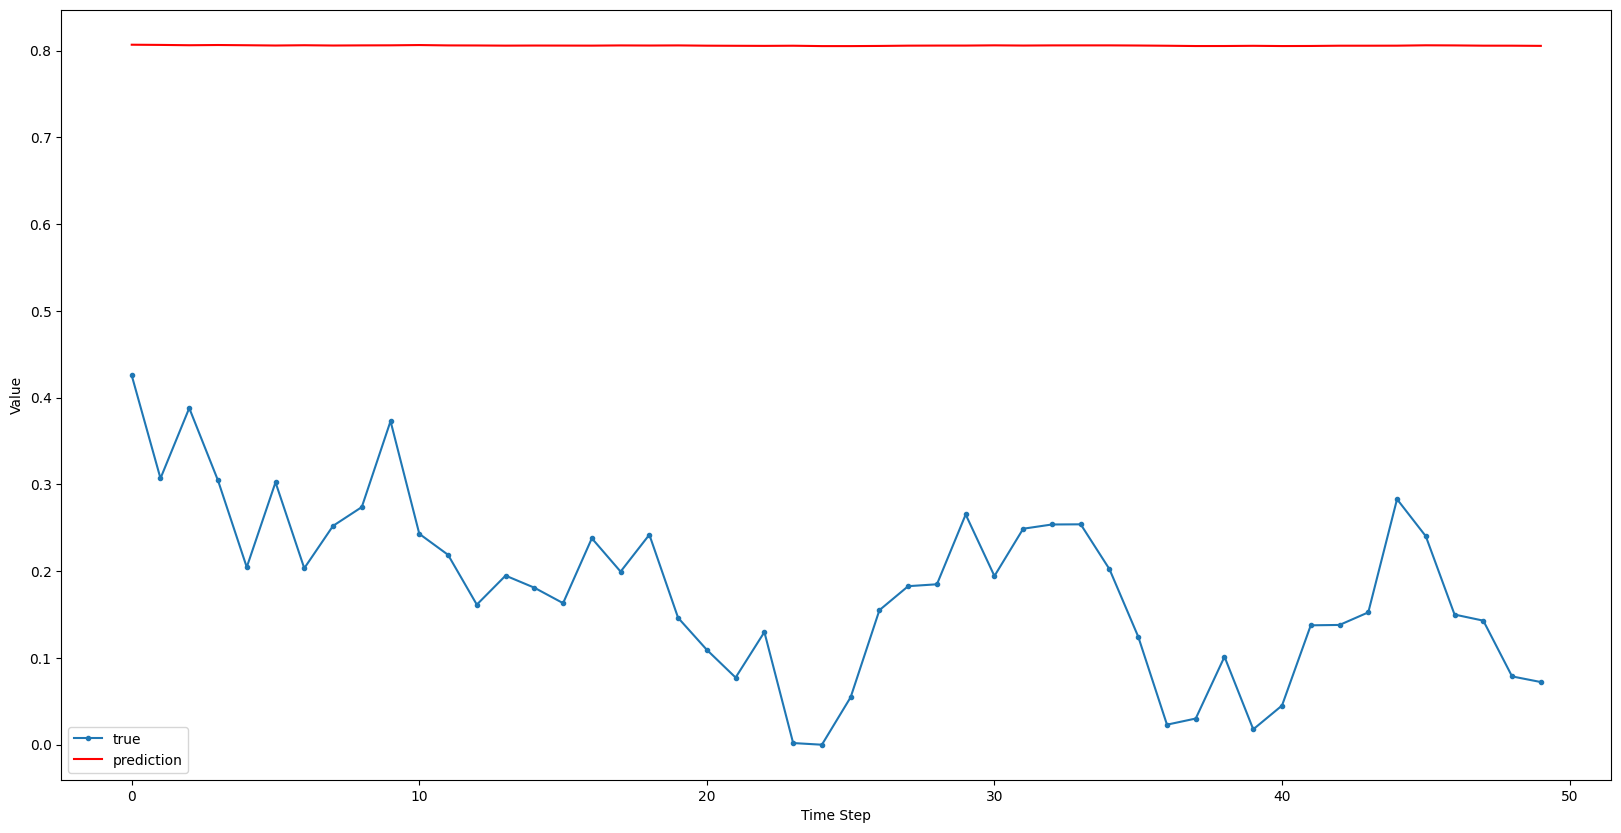

In [4]:
# IMPORTANT: DO NOT EDIT THIS PROGRAM, JUST RUN THE CELL.
# Using AI to predict future time series of Google Finance.
# Importing the relevant libraries and Application Programming Interface (API).
import pandas as pd
pd.options.display.max_colwidth = 60
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy import mean
import numpy as np
import math
import statistics
import pylab
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load data into Pandas data frame.
dataframe = pd.read_csv("GOOG.csv")
df = dataframe
df = df[["Date" , "Close"]]
df.head()
# Normalize the data.
df_min_max_scaled = df.copy()
column = "Close"
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) \
 / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
# View normalized data.
df_min_max_scaled.head()
df_min_max_scaled = df_min_max_scaled.set_index('Date')
df_min_max_scaled.head()
DATA = df_min_max_scaled

# We'll split training and test data as 80-20, respectively.
train_size= int(len(DATA)*0.8)
test_size= len(DATA) - train_size
# Splitting train and test data then printing the size (rows) of each.
train, test = DATA[0:train_size], DATA[train_size:len(DATA)]
print(len(train),len(test))
# Function:create_dataset.
# Converts data into numpy arrays.
def create_dataset(X,y,time_steps=1):
    Xs, ys= [],[]
    for i in range(len(X)-time_steps):
        v= X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 1
# Split data into X_train and y_train datasets.
# (train.Price and test.Price extracts the data from the train and test dataframe).
X_train, y_train = create_dataset(train, train.Close, time_steps)
# Splitting test data into X_test and y_test datasets.
X_test, y_test = create_dataset(test, test.Close, time_steps)
print(X_train.shape, y_train.shape)
# Defining the neural network architecture. Set N1, N2 and N3.
model=keras.Sequential( )
model.add(keras.layers.LSTM(N1,return_sequences = True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.LSTM(N2,return_sequences = True))
model.add(keras.layers.LSTM(N3))
model.add(keras.layers.Dense(1))
# Compile the model, using eta and NumEpochs.
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.Adam(eta))
# Train the model (we use Num_Epochs epochs).
history= model.fit(X_train, y_train, epochs=Num_Epochs,batch_size=16,validation_split=0.2,verbose=0,shuffle=False)
plt.plot(history.history["loss"], label= "train")
plt.plot(history.history["val_loss"], label= "test")
plt.xlabel("Iterations")
plt.ylabel("Loss - Using MSE")
plt.legend()
# Get the models predicted price values.
y_pred=model.predict(X_test)
# Plot the predictions along with the true outcomes
fig=plt.figure(figsize=(20,10))
plt.plot(np.arange(0,len(y_train)), y_train, "g",label="history")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test, marker=".",label="true")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred, "r", label="prediction")
plt.ylabel("Price")
plt.xlabel("Time Step")
plt.legend()
plt.show()
fig=plt.figure(figsize=(20,10))
plt.plot(y_test, marker=".", label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel("Value")
plt.xlabel("Time Step")
plt.legend()
plt.show()

QUESTION: How can the predictions be made even better?